# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from Tools.tools import rec
from Tools.tools import collection
import sounddevice as sd
from python_speech_features import mfcc
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### Collection 
(mis en commentaire apres collecte)

In [49]:
#collection()

#### 1. Importer votre DataSet

In [50]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [51]:
mydata.head(20)

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,13.626307,-8.358610,1.652672,4.559087,3.605715,8.084186,1.277900,3.687070,-0.391045,3.926159,0.394828,-1.025183,0.0
1,12.481881,-8.699096,1.191715,0.548105,1.827466,5.975535,3.931772,7.237499,0.670956,2.290900,-2.812438,0.216187,1.0
2,13.736032,-7.181568,2.363272,4.218754,5.493468,11.080288,4.657533,6.565330,-1.267028,3.296578,-1.382642,1.795250,2.0
3,13.615541,-8.899082,-1.014591,-0.005146,0.791007,5.795868,-0.900621,4.201618,3.258517,8.934901,0.699798,0.746071,3.0
4,13.389833,-10.487380,-0.716591,-0.092303,2.177518,7.676387,0.293865,6.700040,1.712394,6.150116,-0.583791,1.197234,4.0
5,15.287439,-12.684241,-1.538339,2.008096,2.387011,8.605568,2.373760,4.844792,0.635185,3.008278,-0.745027,1.415918,5.0
6,15.120473,-14.290018,-2.330290,6.097526,2.250374,12.024729,-1.344069,4.467819,1.374166,5.705705,-0.752124,0.477974,6.0
7,13.950515,-11.908526,0.227831,2.808594,2.184873,7.445286,0.303100,4.273031,-1.380557,2.953893,0.705131,1.510578,7.0
8,14.073240,-10.132357,2.108557,4.818049,6.313741,9.246517,4.041643,5.060615,0.514676,3.817863,-0.235056,0.318187,8.0
9,14.358092,-9.897269,0.012982,1.393408,0.666087,10.192073,2.226840,5.539084,3.433719,7.989177,-0.120020,1.334828,9.0


In [52]:
mydata.shape

(80, 13)

#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [53]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     80 non-null     float64
 1   Fe2     80 non-null     float64
 2   Fe3     80 non-null     float64
 3   Fe4     80 non-null     float64
 4   Fe5     80 non-null     float64
 5   Fe6     80 non-null     float64
 6   Fe7     80 non-null     float64
 7   Fe8     80 non-null     float64
 8   Fe9     80 non-null     float64
 9   Fe10    80 non-null     float64
 10  Fe11    80 non-null     float64
 11  Fe12    80 non-null     float64
 12  Target  80 non-null     float64
dtypes: float64(13)
memory usage: 8.2 KB


In [54]:
listena = mydata.columns[mydata.isnull().any()]
listena

Index([], dtype='object')

#### 3. Visualiser les targets

In [55]:
target = mydata['Target'].value_counts()
target

9.0    8
8.0    8
7.0    8
6.0    8
5.0    8
4.0    8
3.0    8
2.0    8
1.0    8
0.0    8
Name: Target, dtype: int64

#### Sous forme de diagramme

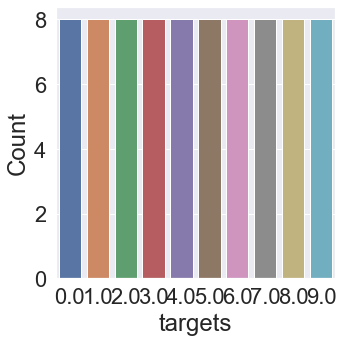

In [56]:
plt.figure(1,figsize=(5,5))
sb.countplot(x='Target', data=mydata)
plt.xlabel('targets')
plt.ylabel('Count')
plt.show()

#### observer la répartition (séparation des caracteristiques) à l'aide d'une réduction de dimensions (PCA=2) permet de mesurer visuellement comment les classes sont distinctes ou mélangées

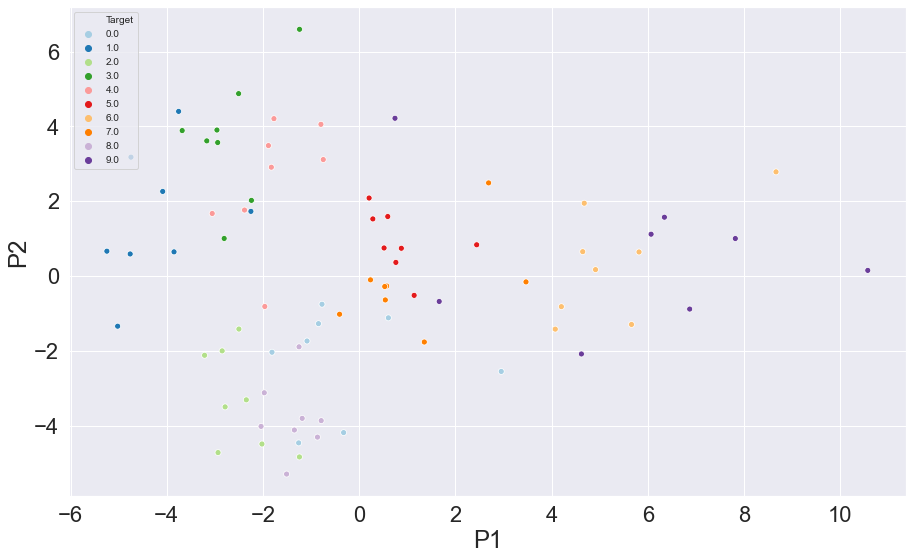

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.legend(loc=2, prop={'size': 10})
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 
Séparation de la classe à prédire (target)

In [58]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(80, 12)

In [59]:
y

0     0.0
1     1.0
2     2.0
3     3.0
4     4.0
     ... 
75    5.0
76    6.0
77    7.0
78    8.0
79    9.0
Name: Target, Length: 80, dtype: float64

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)
séparation du jeu de données en train et test et vérification du bon formatage des matrices

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (64, 12) Test: (16, 12)


#### 6. Développer votre meilleur modèle de classification
construction du pipeline avec différents classifiers, applications de multiples parametres en gridsearch et affichage des performances pour trouver le meilleur classifier avec les meilleurs parametres.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model_name = ['svc', 'svc_0', 'knn', 'knn_0', 'decision_tree', 'decision_tree_0', 'random_forest', 'random_forest_0', 'boost', 'boost_0', 'XGB', 'XGB_0', 'MLP', 'MLP_0']
pipelines = [
             Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
             Pipeline([('svc', SVC())]),
             Pipeline([('scaler', StandardScaler()), ('knn',  KNeighborsClassifier())]),
             Pipeline([('knn',  KNeighborsClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier())]),
             Pipeline([('decision_tree', DecisionTreeClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())]),
             Pipeline([('forest', RandomForestClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
             Pipeline([('boost', GradientBoostingClassifier())]),   
             Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
             Pipeline([('XGB', XGBClassifier())]),    
             Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())]),
             Pipeline([('MLP', MLPClassifier())])]
    
parameters =[{'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]},{'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}, 
            {'knn__n_neighbors': np.arange(1, 10), 
              'knn__metric':["euclidean", "minkowski", "manhattan"]},
            {'knn__n_neighbors': np.arange(1, 10), 
              'knn__metric':["euclidean", "minkowski", "manhattan"]},
             {}, {},
             {'forest__n_estimators': np.arange(100, 125)},{'forest__n_estimators': np.arange(100, 125)},
             {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},{'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},
             {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},{'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
             {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu']},{'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu']}]



best_param = []
Predictions = {}

for model, p, name in zip(pipelines, parameters, model_name):
        exp = GridSearchCV(model, param_grid = p)
        exp.fit(X_train, y_train)
        Predictions[name] = exp.predict(X_test)
        print(f"Score ({name}) : {exp.score(X_test, y_test)*100}% \nMeilleurs paramètres : {exp.best_params_}")
        print("\n ===================================================================== \n")

Score (svc) : 93.75% 
Meilleurs paramètres : {'svc__C': 10, 'svc__kernel': 'rbf'}


Score (svc_0) : 81.25% 
Meilleurs paramètres : {'svc__C': 1, 'svc__kernel': 'linear'}


Score (knn) : 62.5% 
Meilleurs paramètres : {'knn__metric': 'manhattan', 'knn__n_neighbors': 4}


Score (knn_0) : 75.0% 
Meilleurs paramètres : {'knn__metric': 'euclidean', 'knn__n_neighbors': 5}


Score (decision_tree) : 62.5% 
Meilleurs paramètres : {}


Score (decision_tree_0) : 62.5% 
Meilleurs paramètres : {}


Score (random_forest) : 87.5% 
Meilleurs paramètres : {'forest__n_estimators': 123}


Score (random_forest_0) : 81.25% 
Meilleurs paramètres : {'forest__n_estimators': 101}


Score (boost) : 56.25% 
Meilleurs paramètres : {'boost__learning_rate': 0.1, 'boost__loss': 'deviance'}


Score (boost_0) : 75.0% 
Meilleurs paramètres : {'boost__learning_rate': 0.1, 'boost__loss': 'deviance'}


Score (XGB) : 62.5% 
Meilleurs paramètres : {'XGB__eta': 0.3, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 4}


Score

# Application en Temps Réel

In [19]:
#importé au préalable
#from Tools.tools import rec
#from Tools.tools import collection

### Choix du modèle SVC qui donne les meilleurs résultats 
(kernel=rbf  C=10) et avec application de la standadisation de données

In [63]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train=scaler.transform(X_train)
model = SVC(C= 10, kernel= 'rbf')
model.fit(X_train, y_train)

SVC(C=10)

### Utilisation de joblib
joblib permet de sauvegarder des structures de données dans un fichier pour pouvoir les recharger après (par exemple un modèle de machine learning)

In [64]:
import joblib
joblib.dump(MLPClassifier(activation='identity', hidden_layer_sizes = (150,)) , 'SVC')

['SVC']

In [65]:
m_jlib = joblib.load('SVC')
m_jlib.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(150,))

In [78]:
rec(scaler, model)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 


------------------
Digit :  9.0
------------------
